In [2]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
#check for duplicates
df.duplicated(subset=['user id']).sum()

np.int64(0)

In [5]:
#drop unwanted columns
df.drop(['Unnamed: 0','user id'], axis=1, inplace = True)
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [6]:
#check if the categorical variables have right number of levels
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [7]:
for i in df_cat.columns:
    print(i.upper(),":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Univariant Analysis

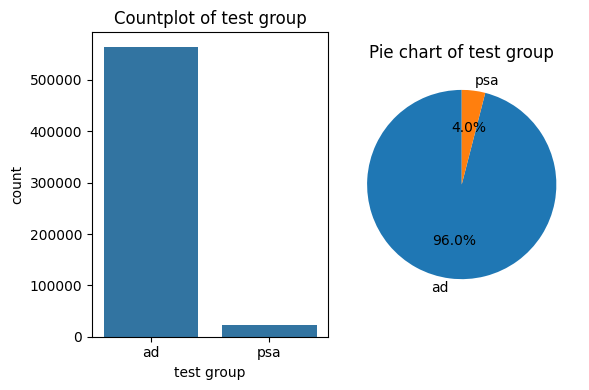

In [8]:
variable = 'test group'

plt.figure(figsize =(6,4))


#countplot
plt.subplot(1,2,1)
sns.countplot(x= variable, data=df_cat)
plt.title('Countplot of '+ variable)

#pie chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts,labels= counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart of '+ variable)

plt.tight_layout()
plt.show()

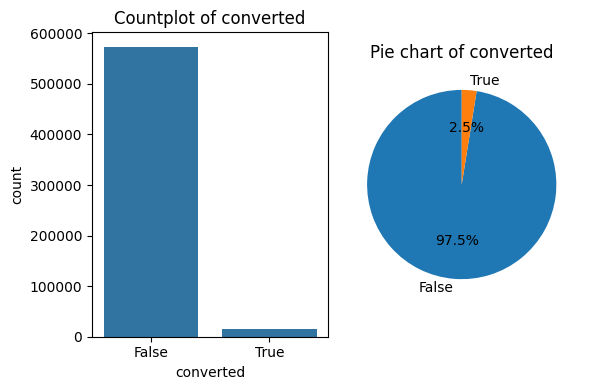

In [9]:
variable = 'converted'

plt.figure(figsize =(6,4))

#countplot
plt.subplot(1,2,1)
sns.countplot(x= variable, data=df_cat)
plt.title('Countplot of '+ variable)

#pie chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts,labels= counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart of '+ variable)

plt.tight_layout()
plt.show()

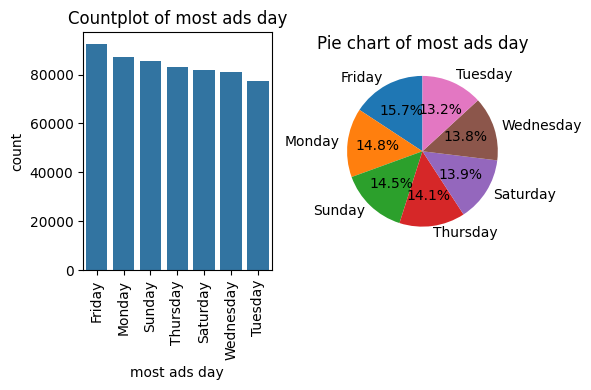

In [10]:
variable = 'most ads day'

plt.figure(figsize =(6,4))

#countplot
plt.subplot(1,2,1)
sns.countplot(x= variable, data=df_cat, order= df_cat['most ads day'].value_counts().index )
plt.title('Countplot of '+ variable)
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts,labels= counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart of '+ variable)

plt.tight_layout()
plt.show()

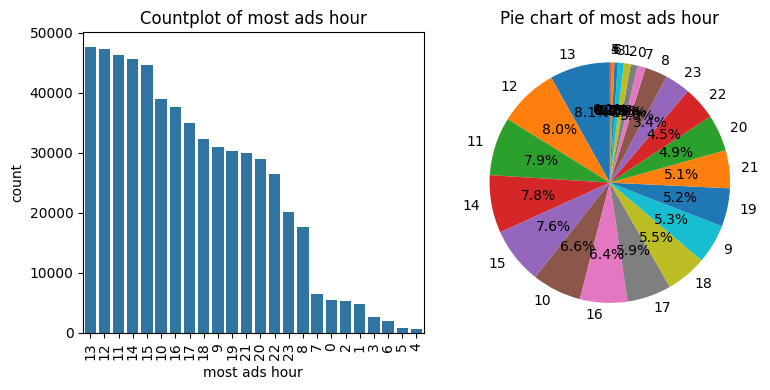

In [11]:
variable = 'most ads hour'

plt.figure(figsize =(8,4))

#countplot
plt.subplot(1,2,1)
sns.countplot(x= variable, data=df_cat, order= df_cat['most ads hour'].value_counts().index )
plt.title('Countplot of '+ variable)
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts,labels= counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart of '+ variable)

plt.tight_layout()
plt.show()

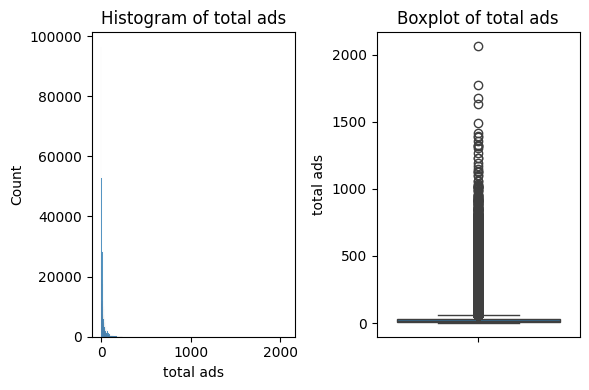

In [12]:
variable ='total ads'

plt.figure(figsize=(6,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title('Histogram of '+ variable)

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title('Boxplot of '+ variable)

plt.tight_layout()
plt.show()  

In [13]:
#check the descriptive statistics of total ads feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

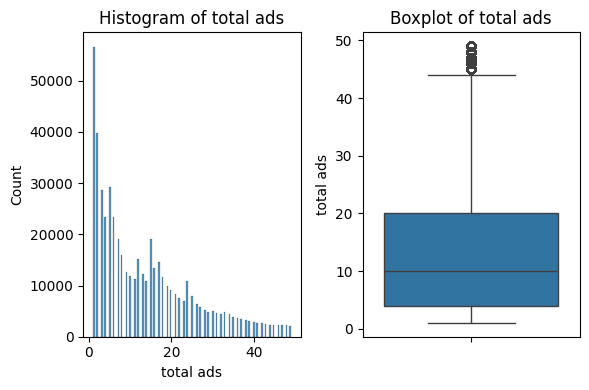

In [14]:
#Filtering the data to remove outliers
variable ='total ads'

plt.figure(figsize=(6,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads']<50])
plt.title('Histogram of '+ variable)

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df['total ads']<50])
plt.title('Boxplot of '+ variable)

plt.tight_layout()
plt.show()  

### Bivariate Analysis 

In [15]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [16]:
ct_conversion_test_group = pd.crosstab(df['test group'],df['converted'],normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


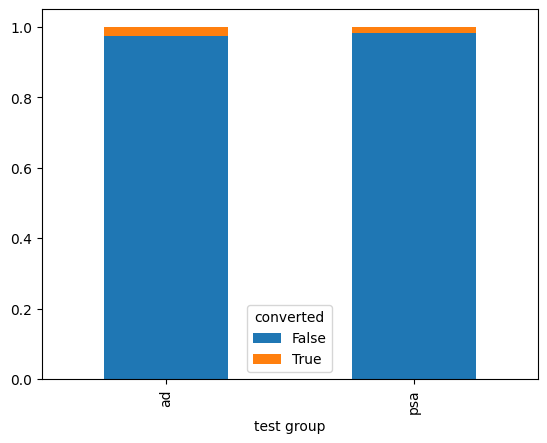

In [17]:
ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


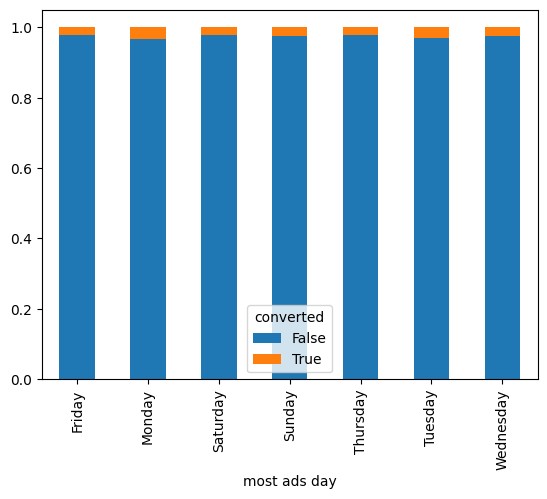

In [18]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending= False))
ct_conversion_day.plot.bar(stacked = True);


converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


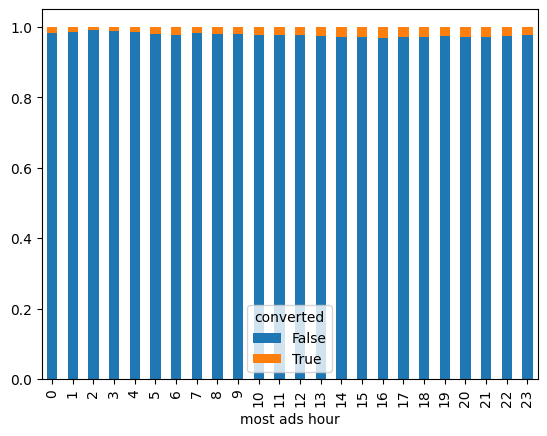

In [19]:
ct_conversion_hour = pd.crosstab( df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by= True, ascending= False))
ct_conversion_hour.plot.bar(stacked=True);

<Axes: xlabel='converted', ylabel='total ads'>

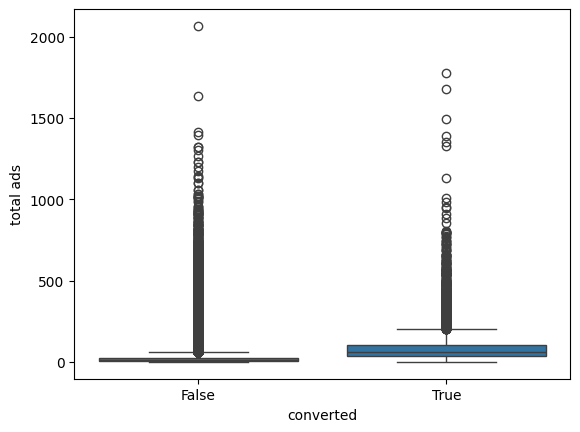

In [20]:
sns.boxplot(x='converted', y='total ads', data=df)

<Axes: xlabel='converted', ylabel='total ads'>

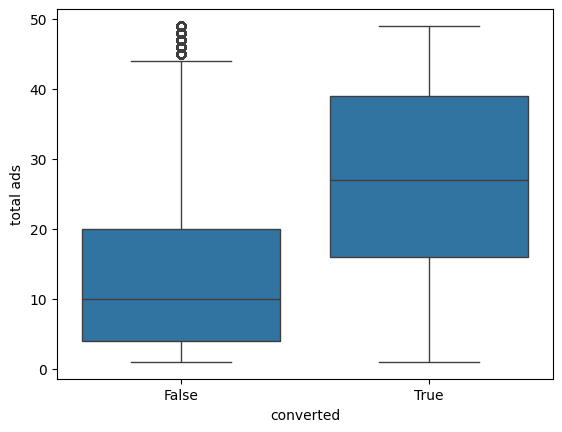

In [21]:
sns.boxplot(x='converted', y='total ads', data = df[df['total ads']<50])

### Statistical Tests

In [24]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        #create a contingency table
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        #perform chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        #display results
        print(f"\nChi-square test for {variable} vs converted:")
        print(f"Chi-square value: {chi2}")
        print(f"P-value: {p}")

        #check significance
        if p < alpha:
            print(f"Reject the null hypothesis: There is a significant association between {variable} and converted.")
        else:
            print(f"Fail to reject the null hypothesis: No significant association between {variable} and converted.")


Chi-square test for test group vs converted:
Chi-square value: 54.005823883685245
P-value: 1.9989623063390075e-13
Reject the null hypothesis: There is a significant association between test group and converted.

Chi-square test for most ads day vs converted:
Chi-square value: 410.0478857936585
P-value: 1.932184379244731e-85
Reject the null hypothesis: There is a significant association between most ads day and converted.

Chi-square test for most ads hour vs converted:
Chi-square value: 430.76869230822086
P-value: 8.027629823696771e-77
Reject the null hypothesis: There is a significant association between most ads hour and converted.


In [25]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [29]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#step 1: check normality

shapiro_stat_true, shapiro_p_true = shapiro(df[df['converted'] == True] ['total ads'])
shapiro_stat_false, shapiro_p_false = shapiro(df[df['converted'] == False] ['total ads'])


print(f"Shapiro-Wilk Test for Normality (True group): p-value = {shapiro_p_true}")
print(f"Shapiro-Wilk Test for Normality (False group): p-value = {shapiro_p_false}")

#Equqality of variance

levene_stat, levene_p = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's Test for Equality of Variance: p-value = {levene_p}")


Shapiro-Wilk Test for Normality (True group): p-value = 1.638680987007864e-98
Shapiro-Wilk Test for Normality (False group): p-value = 9.883049430733551e-204
Levene's Test for Equality of Variance: p-value = 0.0


In [31]:
#step 2: choose and perform the appropriate test

aplha = 0.05

if shapiro_p_true > alpha and shapiro_p_false > alpha and levene_p > alpha:
    #both groups are normally distributed and have equal variance, use independent t-test
    t_stat, t_p = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Independent two sample T-test: p-value = {t_p}")
else:
    #use mann-whitney u test
    u_stat, u_p = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann-Whitney U Test: p-value = {u_p}")

Mann-Whitney U Test: p-value = 0.0
